In [1]:
# The notebook presently uses test images and some testing tools from the test directory.
HOME = "../.." # path to the root of the project two levels up
TEST = joinpath(HOME, "test")

# Activate the environment
using Pkg
Pkg.activate(HOME)
Pkg.precompile()

  Activating project at `/project/IceFloeTracker.jl`


In [2]:
# Load packages
using IceFloeTracker: LopezAcosta2019, load
using ImageSegmentation: labels_map
using Images

## Load the images

In [3]:
loadimg(s::String) = float64.(load(s))

loadimg (generic function with 1 method)

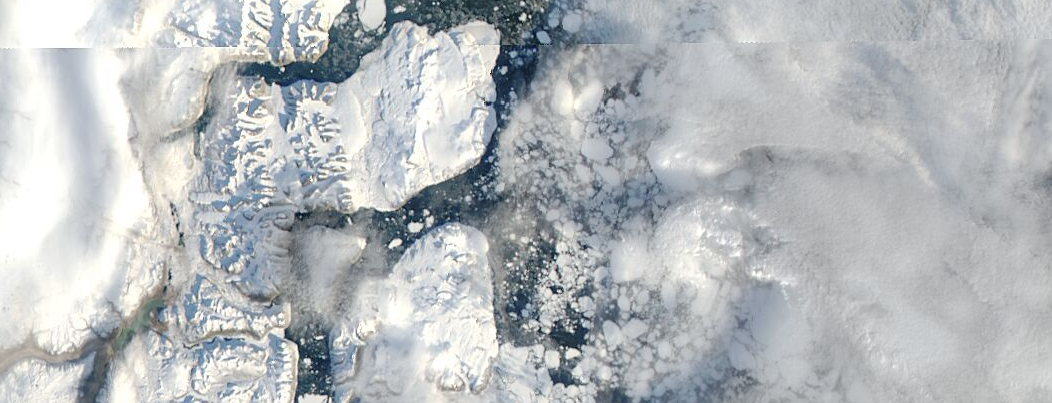

In [4]:
truecolor = loadimg(joinpath(TEST, "test_inputs/pipeline/input_pipeline/20220914.aqua.truecolor.250m.tiff"))

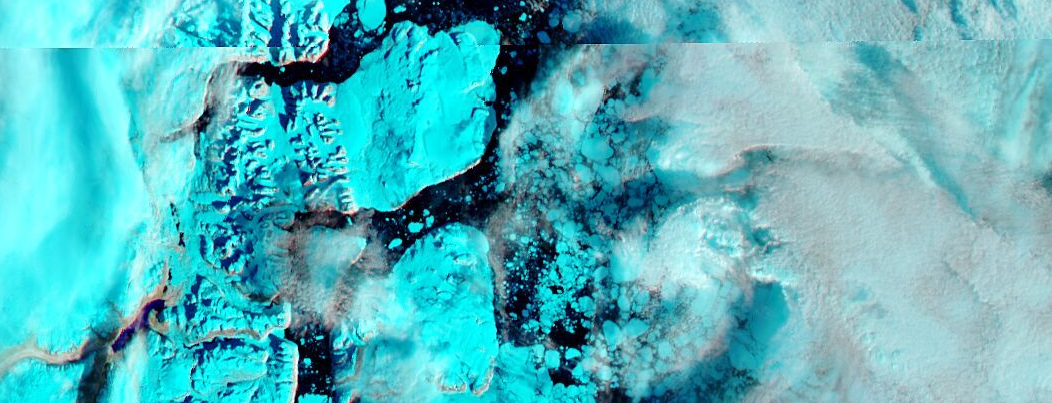

In [ ]:
falsecolor = loadimg(joinpath(TEST, "test_inputs/pipeline/input_pipeline/20220914.aqua.reflectance.250m.tiff"))


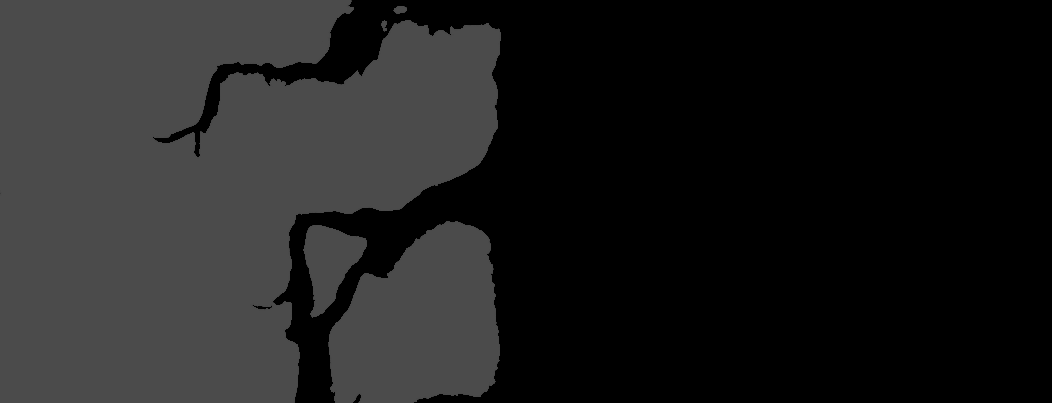

In [5]:
landmask = loadimg(joinpath(TEST, "test_inputs/pipeline/input_pipeline/landmask.tiff"))

## Run the algorithm

We instantiate the algorithm as an object with all of its parameters as follows:

In [12]:
segmentation_algorithm = LopezAcosta2019()

LopezAcosta2019(Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0])

If we wanted to modify the options, we could include those in the call above. 

In [13]:
segments = segmentation_algorithm(truecolor, falsecolor, landmask)

┌ Info: building landmask
└ @ IceFloeTracker /project/IceFloeTracker.jl/src/algorithm.jl:14
┌ Info: Building cloudmask
└ @ IceFloeTracker /project/IceFloeTracker.jl/src/algorithm.jl:17
┌ Info: Finding ice labels
└ @ IceFloeTracker /project/IceFloeTracker.jl/src/algorithm.jl:21
┌ Info: Sharpening truecolor image
└ @ IceFloeTracker /project/IceFloeTracker.jl/src/algorithm.jl:24
┌ Info: Normalizing truecolor image
└ @ IceFloeTracker /project/IceFloeTracker.jl/src/algorithm.jl:34
┌ Info: Discriminating ice/water
└ @ IceFloeTracker /project/IceFloeTracker.jl/src/algorithm.jl:40
┌ Info: Segmenting floes part 1/3
└ @ IceFloeTracker /project/IceFloeTracker.jl/src/algorithm.jl:46
┌ Info: Segmenting floes part 2/3
└ @ IceFloeTracker /project/IceFloeTracker.jl/src/algorithm.jl:52
┌ Info: Building watersheds
└ @ IceFloeTracker /project/IceFloeTracker.jl/src/algorithm.jl:56
┌ Info: Segmenting floes part 3/3
└ @ IceFloeTracker /project/IceFloeTracker.jl/src/algorithm.jl:67
┌ Info: Done with k-means 

Segmented Image with:
  labels map: 403×1052 Matrix{Int64}
  number of labels: 44

To show the results with each segment marked using its mean color:

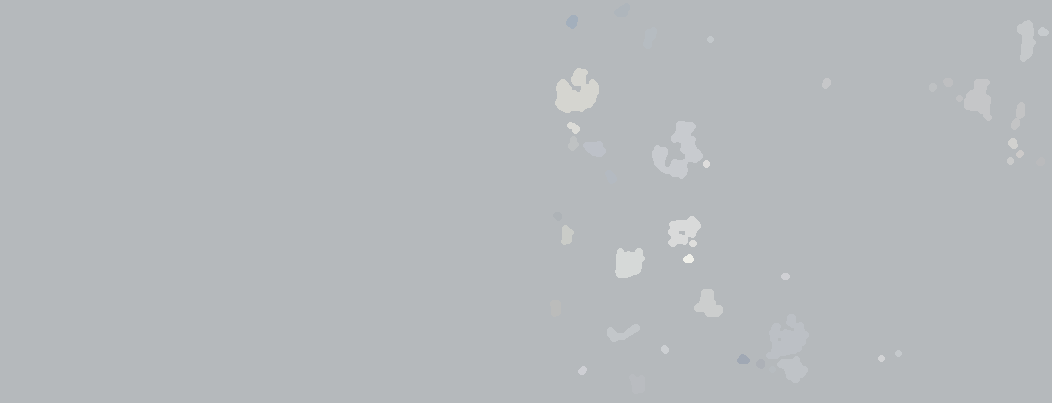

In [15]:
map(i -> segment_mean(segments, i), labels_map(segments))

We can do the same with the falsecolor image:

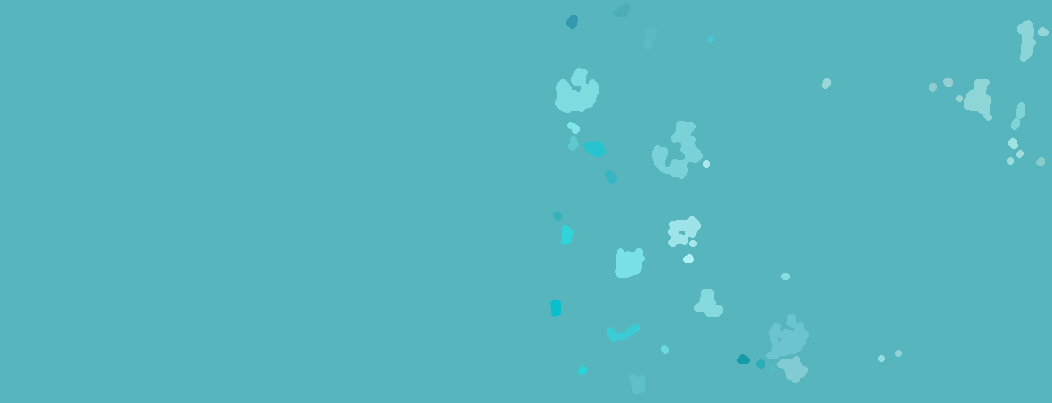

In [16]:
# Get the labels_map
segments_falsecolor = ImageSegmentation.SegmentedImage(falsecolor, labels_map(segments))
map(i -> segment_mean(segments_falsecolor, i), labels_map(segments_falsecolor))